In [1]:
import pandas as pd

In [2]:
file = ('/Users/toddmoffett1/DSI/dsi_workspace/curriculum/week-01/2.2-Python-Data-Intake/names/yob%d.txt')

In [3]:
years = range(1880,2016)
# Create temporary list
pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = "/Users/toddmoffett1/DSI/dsi_workspace/curriculum/week-01/2.2-Python-Data-Intake/names/yob%d.txt" % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)

# Concatenate 
names = pd.concat(pieces, ignore_index=True)

In [7]:
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [41]:
total_births = names.pivot_table('births', index='sex', columns='year', aggfunc=sum)

In [42]:
total_births

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
sex,,,,,,,,,,,,,,,,,,,,,
F,90992,91953,107848,112318,129020,133055,144534,145981,178624,178366,...,1898776,1919775,1887660,1833461,1773440,1754424,1755254,1747544,1777242,1769325
M,110490,100743,113686,104627,114443,107799,110785,101415,120850,110582,...,2052652,2072505,2036750,1979895,1914629,1894262,1890889,1883945,1910876,1898858


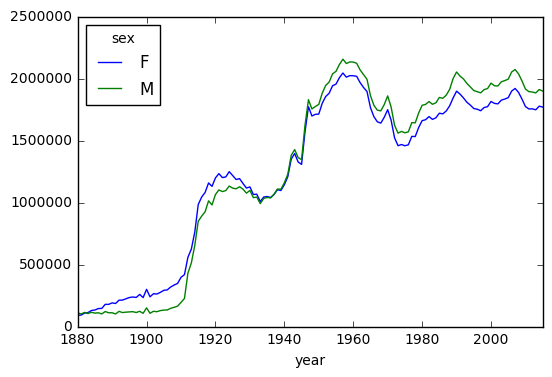

In [17]:
%matplotlib inline
total_births.plot()

In [16]:
names.groupby('sex')['births'].sum().sort_values(axis=0)[:5]

sex
F    168861581
M    171990331
Name: births, dtype: int64